In [1]:
import warnings

warnings.filterwarnings("ignore")

from vega_datasets import data

# Exercises

> For all of the datasets below, examine the data types of each column, ensure that the dates are in the proper format, and set the dataframe's index to the date column as appropriate.

> For this exercise you'll need to install a library that will provide us access to some more datasets:


> pip install vega_datasets ✔️
You can use this library like so:

--------------------------------------------------------

> Call the sf_temps() dataset from the vega_datasets library like so:

In [2]:
df1 = data.sf_temps()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [3]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
temp,8759.0,56.924112,6.107079,45.6,52.3,56.5,60.7,72.2


In [4]:
df1.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [5]:
df1.date.value_counts()

2010-01-01 00:00:00    1
2010-09-01 11:00:00    1
2010-09-01 05:00:00    1
2010-09-01 06:00:00    1
2010-09-01 07:00:00    1
                      ..
2010-05-02 11:00:00    1
2010-05-02 10:00:00    1
2010-05-02 09:00:00    1
2010-05-02 08:00:00    1
2010-12-31 23:00:00    1
Name: date, Length: 8759, dtype: int64

> Use the above dataset for the following exercises:

* **Resample by the day and take the average temperature. Visualize the average temperature over time.**

In [6]:
# setting date as index
df1 = df1.set_index('date')
df1.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


In [7]:
# sorting by date
df1 = df1.sort_values(by='date')
df1.head(3)

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9


In [8]:
df1 = df1.resample('d').mean()

In [9]:
df1.head()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667


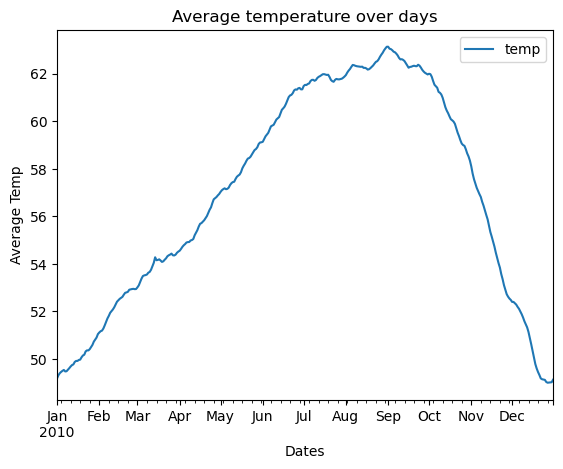

In [10]:
import matplotlib.pyplot as plt

df1.plot()
plt.title('Average temperature over days')
plt.xlabel('Dates')
plt.ylabel('Average Temp')
plt.legend()
plt.show()

* **Write the code necessary to visualize the minimum temperature over time.**

In [11]:
def prep_temps():
    df = data.sf_temps()
    df = df.set_index('date')
    df = df.sort_values(by='date')

    return df

In [12]:
df1 = prep_temps()

In [13]:
df1 = df1.resample('d').min()
df1.head()

,temp
date,
2010-01-01,45.8
2010-01-02,46.0
2010-01-03,46.1
2010-01-04,46.1
2010-01-05,46.1


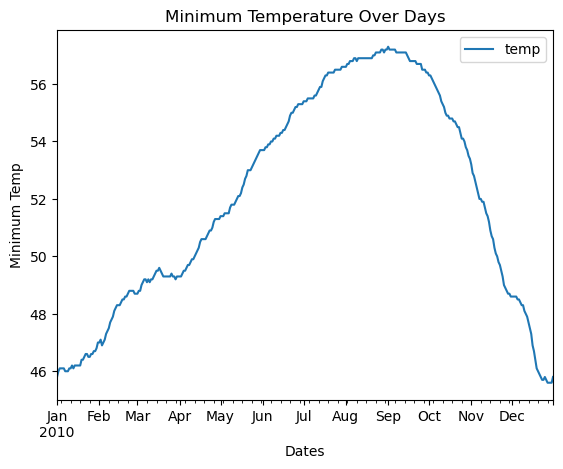

In [14]:
df1.plot()
plt.title('Minimum Temperature Over Days')
plt.xlabel('Dates')
plt.ylabel('Minimum Temp')
plt.legend()
plt.show()

- I can see here that the line changed slightly, but still is representative of the trend and shape that the mean values had

* **Write the code necessary to visualize the maximum temperature over time.**

In [15]:
df1 = prep_temps()

In [16]:
df1 = df1.resample('d').max()
df1.head(2)

,temp
date,
2010-01-01,53.3
2010-01-02,53.4


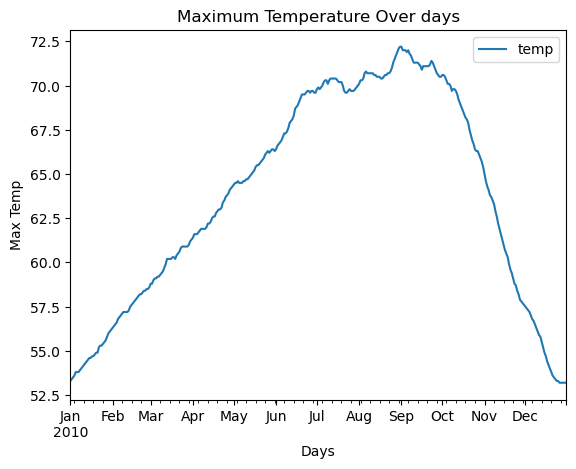

In [17]:
df1.plot()
plt.title('Maximum Temperature Over days')
plt.xlabel('Days')
plt.ylabel('Max Temp')
plt.legend()
plt.show()

* **Which month is the coldest, on average?**

*The plot suggests that **January** is the coldest month*

In [18]:
monthly_avg_temp = df1.resample('M')['temp'].mean()
monthly_avg_temp[:1]

date
2010-01-31    54.651613
Freq: M, Name: temp, dtype: float64

In [19]:
coldest_month = monthly_avg_temp.idxmin()
coldest_month

Timestamp('2010-01-31 00:00:00', freq='M')

* **Which month has the highest average temperature?**

*The plot suggests that **September** is the hottest month*

In [20]:
monthly_avg_temp =  df1.resample('M')['temp'].mean()
monthly_avg_temp[:1]

date
2010-01-31    54.651613
Freq: M, Name: temp, dtype: float64

In [58]:
hottest_month = monthly_avg_temp.idxmax()
hottest_month

Timestamp('2010-09-30 00:00:00', freq='M')

* **Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?**

In [22]:
df1 = prep_temps()

In [23]:
df1 = df1.resample('d').agg(['min', 'max'])
df1.head()

temp      
             min   max
date                  
2010-01-01  45.8  53.3
2010-01-02  46.0  53.4
2010-01-03  46.1  53.5
2010-01-04  46.1  53.6
2010-01-05  46.1  53.8

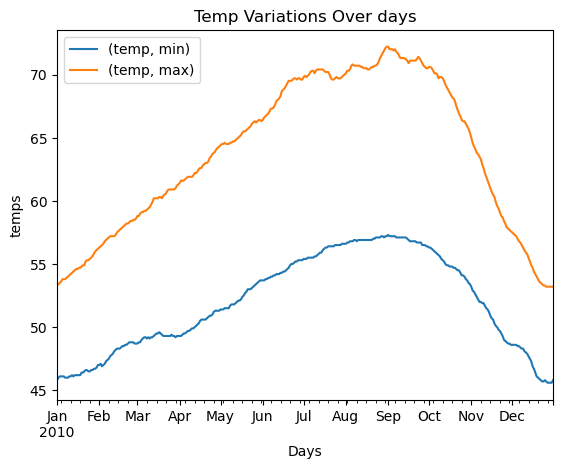

In [24]:
df1.plot()
plt.title('Temp Variations Over days')
plt.xlabel('Days')
plt.ylabel('temps')
plt.legend()
plt.show()

- september

## Bonus: 

* **Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.**

In [25]:
df1 = prep_temps()

In [26]:
df1.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


# 

In [27]:
df1 = df1.resample('d').agg(['min', 'mean', 'max'])
df1.head()

temp                 
             min       mean   max
date                             
2010-01-01  45.8  49.170833  53.3
2010-01-02  46.0  49.304167  53.4
2010-01-03  46.1  49.391667  53.5
2010-01-04  46.1  49.445833  53.6
2010-01-05  46.1  49.491667  53.8

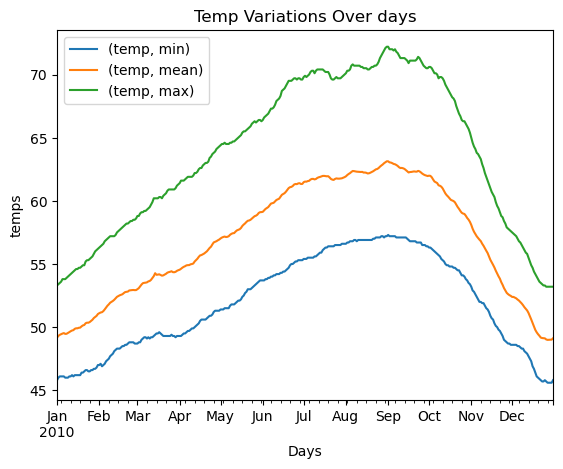

In [28]:
df1.plot()
plt.title('Temp Variations Over days')
plt.xlabel('Days')
plt.ylabel('temps')
plt.legend()
plt.show()

In [29]:
df2 = data.seattle_weather()

> Use the above dataset for the following exercises:

In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [31]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
precipitation,1461.0,3.029432,6.680194,0.0,0.0,0.0,2.8,55.9
temp_max,1461.0,16.439083,7.349758,-1.6,10.6,15.6,22.2,35.6
temp_min,1461.0,8.234771,5.023004,-7.1,4.4,8.3,12.2,18.3
wind,1461.0,3.241136,1.437825,0.4,2.2,3.0,4.0,9.5


In [32]:
df2.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


* **Which year and month combination has the highest amount of precipitation?**

In [33]:
def prep_sw():
    df = data.seattle_weather()
    df = df.set_index('date')
    df = df.sort_values(by='date')
    df = df.rename(columns={'precipitation' : 'rain'})

    return df

In [34]:
df2 = prep_sw()

In [35]:
# df2.resample('y','m').max('precipitation') (attempt 1)
max_rain_month = df2.resample('M').sum()['rain'].idxmax()

In [36]:
max_rain_month

Timestamp('2015-12-31 00:00:00', freq='M')

* **Visualize the amount of monthly precipitation over time.**

In [37]:
df2 = prep_sw()

In [38]:
df2 = df2.resample('m').sum()['rain']

In [39]:
df2.head()

date
2012-01-31    173.3
2012-02-29     92.3
2012-03-31    183.0
2012-04-30     68.1
2012-05-31     52.2
Freq: M, Name: rain, dtype: float64

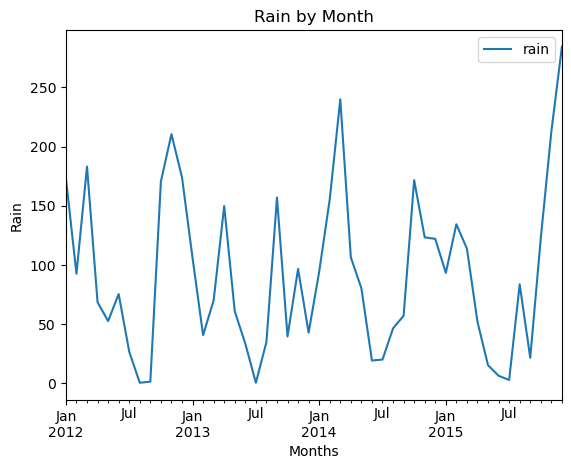

In [40]:
df2.plot()
plt.title('Rain by Month')
plt.xlabel('Months')
plt.ylabel('Rain')
plt.legend()
plt.show()

* **Visualize the amount of wind over time. Choose a time interval you think is appropriate.**

### Days intervals

In [41]:
df2 = prep_sw()

In [42]:
df2 = df2.resample('d').sum()['wind']

In [43]:
df2.head()

date
2012-01-01    4.7
2012-01-02    4.5
2012-01-03    2.3
2012-01-04    4.7
2012-01-05    6.1
Freq: D, Name: wind, dtype: float64

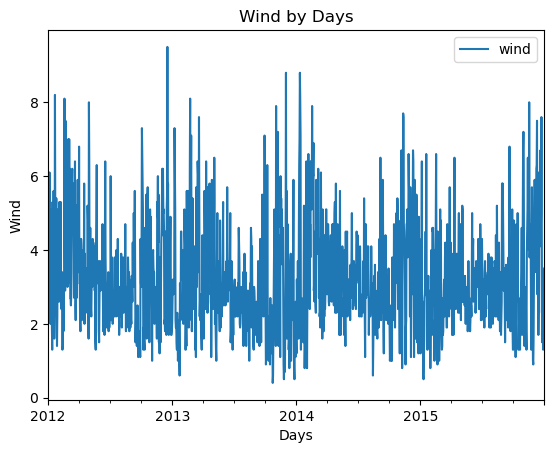

In [44]:
df2.plot()
plt.title('Wind by Days')
plt.xlabel('Days')
plt.ylabel('Wind')
plt.legend()
plt.show()

-----------------------------

### Months intervals

In [45]:
df2 = prep_sw()

In [46]:
df2 = df2.resample('m').sum()['wind']

In [47]:
df2.head()

date
2012-01-31    120.9
2012-02-29    113.2
2012-03-31    131.7
2012-04-30    101.2
2012-05-31    104.0
Freq: M, Name: wind, dtype: float64

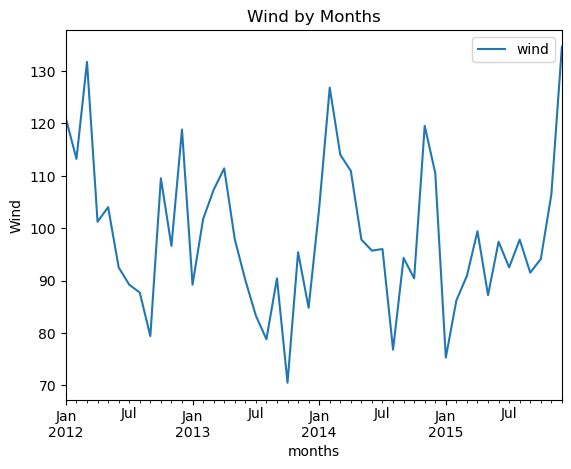

In [48]:
df2.plot()
plt.title('Wind by Months')
plt.xlabel('months')
plt.ylabel('Wind')
plt.legend()
plt.show()

-----------

### Years intervals

In [49]:
df2 = prep_sw()

In [50]:
df2 = df2.resample('y').sum()['wind']

In [51]:
df2.head()

date
2012-12-31    1244.7
2013-12-31    1100.8
2014-12-31    1236.5
2015-12-31    1153.3
Freq: A-DEC, Name: wind, dtype: float64

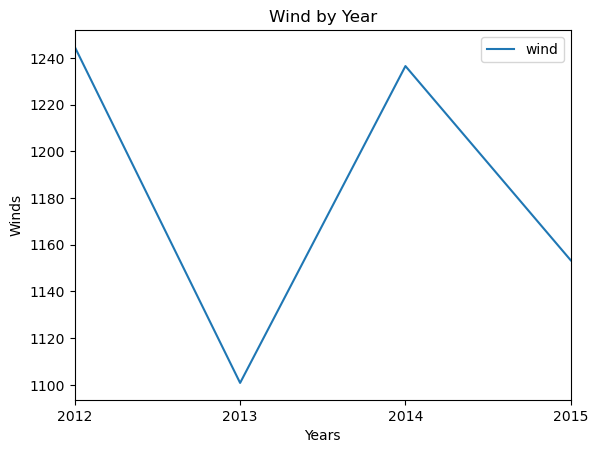

In [52]:
df2.plot()
plt.title('Wind by Year')
plt.xlabel('Years')
plt.ylabel('Winds')
plt.legend()
plt.show()

* **Which year-month combination is the windiest?**

In [53]:
df2 = prep_sw()

In [54]:
max_wind_index = df2['wind'].idxmax()
max_wind_index

Timestamp('2012-12-17 00:00:00')

In [55]:
month_year_combination = max_wind_index.strftime("%Y-%m")
month_year_combination

'2012-12'

- december of 2012

-----------

* **What's the sunniest year?** (*Hint: which year has the highest number of days where weather == sun?*)

In [210]:
df2 = prep_sw()

In [211]:
# boolean mask used to updated dataframe with weather as only sun
df2 = df2[df2['weather'] == 'sun']
df2

,rain,temp_max,temp_min,wind,weather
date,,,,,
2012-01-08,0.0,10.0,2.8,2.0,sun
2012-01-11,0.0,6.1,-1.1,5.1,sun
2012-01-12,0.0,6.1,-1.7,1.9,sun
2012-01-13,0.0,5.0,-2.8,1.3,sun
2012-02-02,0.0,8.3,1.7,2.6,sun
...,...,...,...,...,...
2015-12-13,1.3,7.8,6.1,6.1,sun
2015-12-14,0.0,7.8,1.7,1.7,sun
2015-12-26,0.0,4.4,0.0,2.5,sun


In [212]:
# resample by year and used value count methods to return day count of each year
df2 = df2.resample('y')['weather'].value_counts()
df2

date        weather
2012-12-31  sun        118
2013-12-31  sun        205
2014-12-31  sun        211
2015-12-31  sun        180
Name: weather, dtype: int64

In [213]:
# returned max count from index with argmax method
most_sunny_year = df2.index[df2.argmax()]
most_sunny_year

(Timestamp('2014-12-31 00:00:00', freq='A-DEC'), 'sun')

- The year 2014 had to most sunny days

-----------------

* **In which month does it rain the most?**

In [235]:
df2 = prep_sw()

In [236]:
df2.head(2)

,rain,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain


In [237]:
df2 = df2[df2['weather'] == 'rain']
df2.head(2)

,rain,temp_max,temp_min,wind,weather
date,,,,,
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain


In [238]:
df2 = df2.resample('M')['weather'].value_counts()
df2

date        weather
2012-01-31  rain       18
2012-02-29  rain       17
2012-03-31  rain       19
2012-04-30  rain       19
2012-05-31  rain       16
2012-06-30  rain       19
2012-07-31  rain       12
2012-08-31  rain        2
2012-09-30  rain        4
2012-10-31  rain       17
2012-11-30  rain       25
2012-12-31  rain       23
2013-01-31  rain       16
2013-02-28  rain       23
2013-03-31  rain       18
2013-07-31  rain        1
2013-08-31  rain        1
2013-10-31  rain        1
2014-07-31  rain        1
2014-08-31  rain        1
2014-10-31  rain        1
2015-01-31  rain        1
2015-04-30  rain        1
2015-08-31  rain        2
2015-10-31  rain        1
Name: weather, dtype: int64

In [239]:
# returned max count from index with argmax method
most_rainy_month = df2.index[df2.argmax()]
most_rainy_month

(Timestamp('2012-11-30 00:00:00', freq='M'), 'rain')

- November has the most rain

-------

* **Which month has the most number of days with a non-zero amount of precipitation?**

In [289]:
df2 = prep_sw()

In [290]:
df2 = df2[df2['rain'] != 0]
df2.head()

,rain,temp_max,temp_min,wind,weather
date,,,,,
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain
2012-01-06,2.5,4.4,2.2,2.2,rain


In [291]:
df2 = df2.resample('m')['rain'].count()

In [292]:
df2.head()

date
2012-01-31    22
2012-02-29    19
2012-03-31    22
2012-04-30    17
2012-05-31    10
Freq: M, Name: rain, dtype: int64

In [294]:
most_rainy_month = df2.index[df2.argmax()]
most_rainy_month

Timestamp('2012-12-31 00:00:00', freq='M')

In [296]:
df3 = data.flights_20k()

> Use the above dataset for the following exercises:

In [298]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         20000 non-null  datetime64[ns]
 1   delay        20000 non-null  int64         
 2   distance     20000 non-null  int64         
 3   origin       20000 non-null  object        
 4   destination  20000 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 781.4+ KB


In [299]:
df3.describe()

,delay,distance
count,20000.000000,20000.000000
mean,8.103600,505.262400
std,25.375748,356.950889
min,-58.000000,108.000000
25%,-5.000000,284.000000
50%,0.000000,370.000000
75%,12.000000,611.000000
max,509.000000,2298.000000


In [300]:
df3.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


* **Convert any negative delays to 0.**

In [302]:
df3['delay'] = df3['delay'].where(df3['delay'] >= 0, 0)

In [303]:
df3.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,0,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,0,550,MSY,MCO
4,2001-03-30 21:45:00,0,229,STL,IND


* **Which hour of the day has the highest average delay?**

In [ ]:
df3.

* **Does the day of the week make a difference in the delay amount?**

* **Does the month make a difference in the delay amount?**

# Bonus

In [ ]:
data.iowa_electricity()

> Use the above dataset for the following exercises:

* **For each row, calculate the percentage of the year's total that energy source provided.**

* **Lineplot of generation over time, color by source**

* **Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)**

* **Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?**

* **Is the total generation increasing over time?**
    * *How would you control for increasing consumption over time when considering how much energy is coming from each source?*
    * *express each number as a % of the year's total*

----------------------------------------------------------------------------------------------------------------

> Use the sf_temps dataset

* **Create 4 categories for temperature, cold, cool, warm, hot** (*hint: use pd.cut or pd.qcut for this*)

* **How does the occurances of these 4 categories change month over month? i.e. how many days have each distinction? Visualize this and give the visual appropriate colors for each category.**

* **Create pretty labels for time plots**

* **Visualize the number of days of each month that fall into each bin by year (e.g. x=month, y=n_days, hue=temp_bin) or st similar** 

> Explore the birdstrikes dataset.

In [ ]:
df = data.birdstrikes()
df.head()